In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt


In [2]:
def build_autoencoder_with_l2(input_shape):
    l2_reg = regularizers.l2(0.001) 
    # Encoder
    encoder_input = layers.Input(shape=input_shape)
    x = layers.Dense(32, activation='relu', kernel_regularizer=l2_reg)(encoder_input)
    latent_space = layers.Dense(16, activation='relu', kernel_regularizer=l2_reg)(x)
    # Decoder
    x = layers.Dense(32, activation='relu', kernel_regularizer=l2_reg)(latent_space)
    decoder_output = layers.Dense(input_shape[0], activation='linear', kernel_regularizer=l2_reg)(x)
    # Autoencoder model
    autoencoder = models.Model(encoder_input, decoder_output)
    return autoencoder



In [3]:
def generate_data(samples=1000, features=20):
    X = np.random.randn(samples, features)
    return X, X


In [4]:
class WeightTracker(tf.keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.weights_history = []
    def on_epoch_end(self, epoch, logs=None):
        self.weights_history.append(self.model.layers[1].get_weights()[0].flatten())

In [5]:
# Generate random data
X_train, y_train = generate_data()
input_shape = (X_train.shape[1],)
autoencoder = build_autoencoder_with_l2(input_shape)

autoencoder.compile(optimizer='adam', loss='mse')

weight_tracker = WeightTracker()
history = autoencoder.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, callbacks=[weight_tracker])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1649 - val_loss: 1.0914
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 1.0875 - val_loss: 1.0518
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 1.0327 - val_loss: 1.0144
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - loss: 1.0162 - val_loss: 0.9710
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.9596 - val_loss: 0.9210
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 0.8822 - val_loss: 0.8613
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 0.8399 - val_loss: 0.7980
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.7747 - val_loss: 0.7466
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.7339 - val_loss: 0.7071
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6625 - val_loss: 0.6736
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6360 - val_loss: 0.6392
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - los

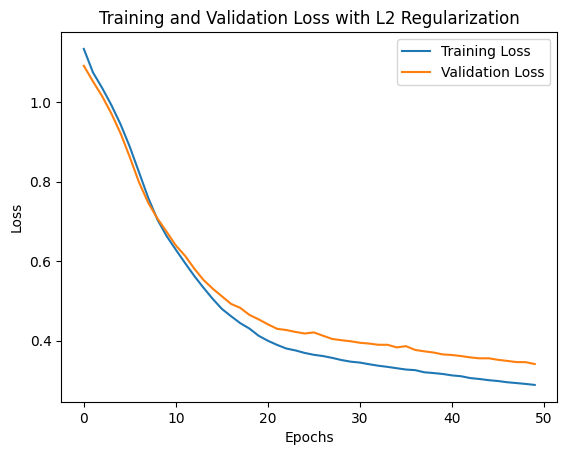

In [6]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


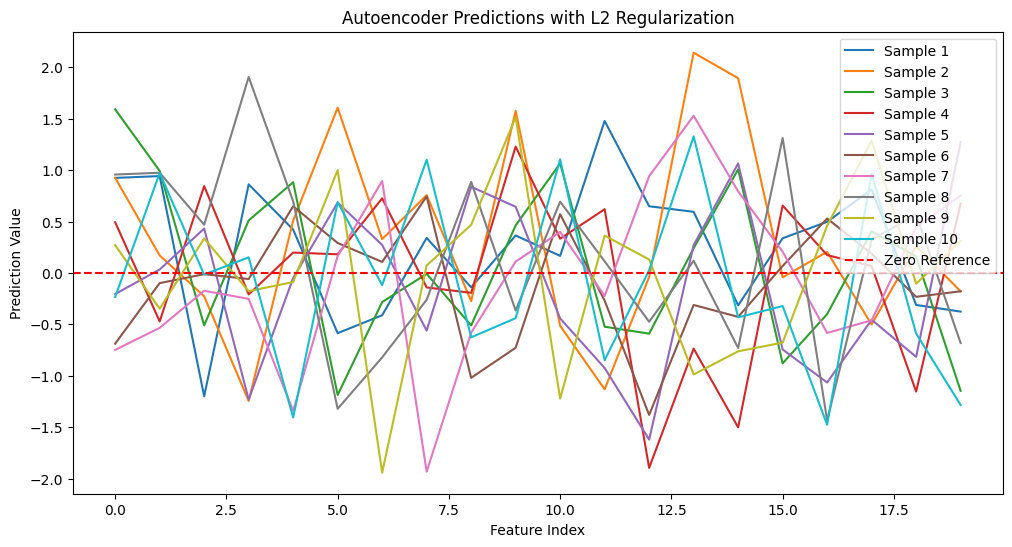

In [7]:

predictions = autoencoder.predict(X_train)

plt.figure(figsize=(12, 6))
num_samples = 10 
for i in range(num_samples):
    plt.plot(predictions[i], label=f'Sample {i+1}')

plt.title('Autoencoder Predictions with L2 Regularization')
plt.xlabel('Feature Index')
plt.ylabel('Prediction Value')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Reference')
plt.legend(loc='upper right')
plt.show()


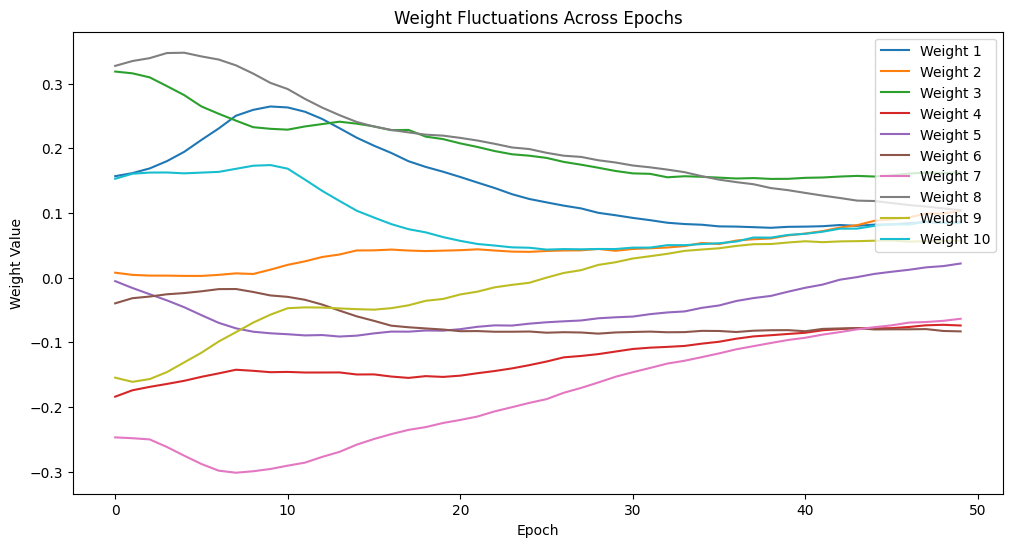

In [8]:

weights_history = np.array(weight_tracker.weights_history)

# Plot the weight fluctuations over epochs
plt.figure(figsize=(12, 6))
for i in range(min(10, weights_history.shape[1])):  # Plot a few weight fluctuations
    plt.plot(weights_history[:, i], label=f'Weight {i+1}')

plt.title('Weight Fluctuations Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.legend(loc='upper right')
plt.show()